In [1]:
from kwantrl.simulations.pixel_array import pixelarrayQPC
from kwantrl.optimization.trajectory_optimization import trajectory_func_to_optimize
from kwantrl.optimization.cma import optimize_cma
from kwantrl.lossfunctions.staircasiness import staircasiness
from kwantrl.datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count
import matplotlib as mpl

mpl.rcParams['figure.dpi']=100
mpl.rcParams["figure.facecolor"]='white'
mpl.rcParams["axes.facecolor"]='white'
mpl.rcParams["savefig.facecolor"]='white'

-2

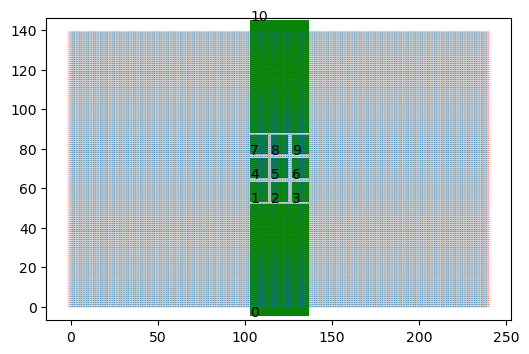

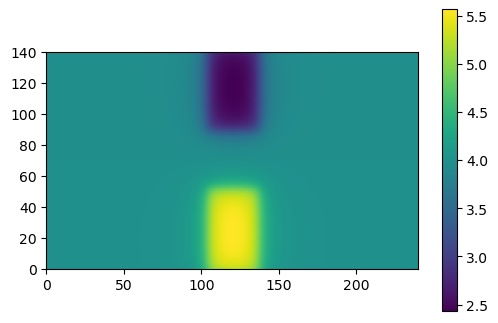

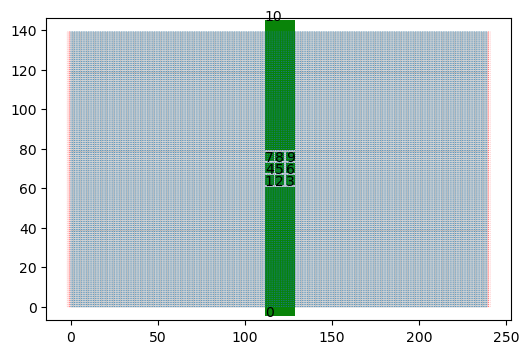

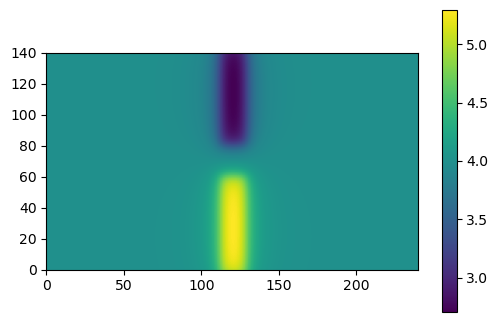

In [3]:
start=-3
stop=2
steps=200

# Parameters for QPC
disorder=0.15
outer_gates=-3
B_field=0
energy=1

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
W=140
L=240
gate_dict={'W':W,'L':L,'scale':2}
QPC=pixelarrayQPC(W=W,L=L,plot=True,pixel_scale=2)


W=140
L=240
gate_dict={'W':W,'L':L,'scale':1}
QPC=pixelarrayQPC(W=W,L=L,plot=True,pixel_scale=1)

QPC.V11

# QPC.U0=disorder
# QPC.energy=energy
# QPC.V1=outer_gates
# QPC.V11=outer_gates
# QPC.phi=B_field

# dat=datahandler()
# _=QPC.plot_disorder()

In [10]:
# import matplotlib.pyplot as plt
# QPC.energy=2
# with plt.style.context('classic'):
#     fig,ax=plt.subplots()
#     for test in np.arange(-10,-3,2):
#         QPC.V1=test
#         QPC.V11=test
#         run=QPC.parallel_transmission(common_voltages)
#         ax.plot(run,label=f'{test:.1f}')
#     ax.legend(loc='upper left')

In [11]:
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.window_loss,'bounds':(-3,2),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result,es,run_id=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=16*3600,QPC=QPC)

data saved to:
/Users/qdev_26/Documents/PhD/kwantrl/kwantrl_data/outcmaes/17/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=994302, Tue Feb 15 11:40:55 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 9.849382844254071e-01 1.0e+00 4.57e-01  5e-01  5e-01 3:41.3
    2     24 1.002525751126719e+00 1.1e+00 4.20e-01  4e-01  4e-01 7:22.8
    3     36 1.018442512929247e+00 1.1e+00 3.95e-01  4e-01  4e-01 11:03.5
    4     48 1.027851163795727e+00 1.1e+00 3.83e-01  4e-01  4e-01 14:45.1
    5     60 1.051662557305353e+00 1.2e+00 3.55e-01  3e-01  4e-01 18:26.2
    6     72 1.005967338810411e+00 1.2e+00 3.39e-01  3e-01  3e-01 22:00.4
    7     84 1.048026605360687e+00 1.2e+00 3.29e-01  3e-01  3e-01 25:30.1
    8     96 1.006580362720541e+00 1.3e+00 3.10e-01  3e-01  3e-01 28:59.8
    9    108 9.984968012382840e-01 1.3e+00 2.96e-01  3e-01  3e-01 32:29.6
   10    120 1.027388693646792e+00 1.3e+00 2.92e-01  3e-01  3e-01 36:00.0
   11    132 1.02036

(<Figure size 1200x800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2552f27eb88>)

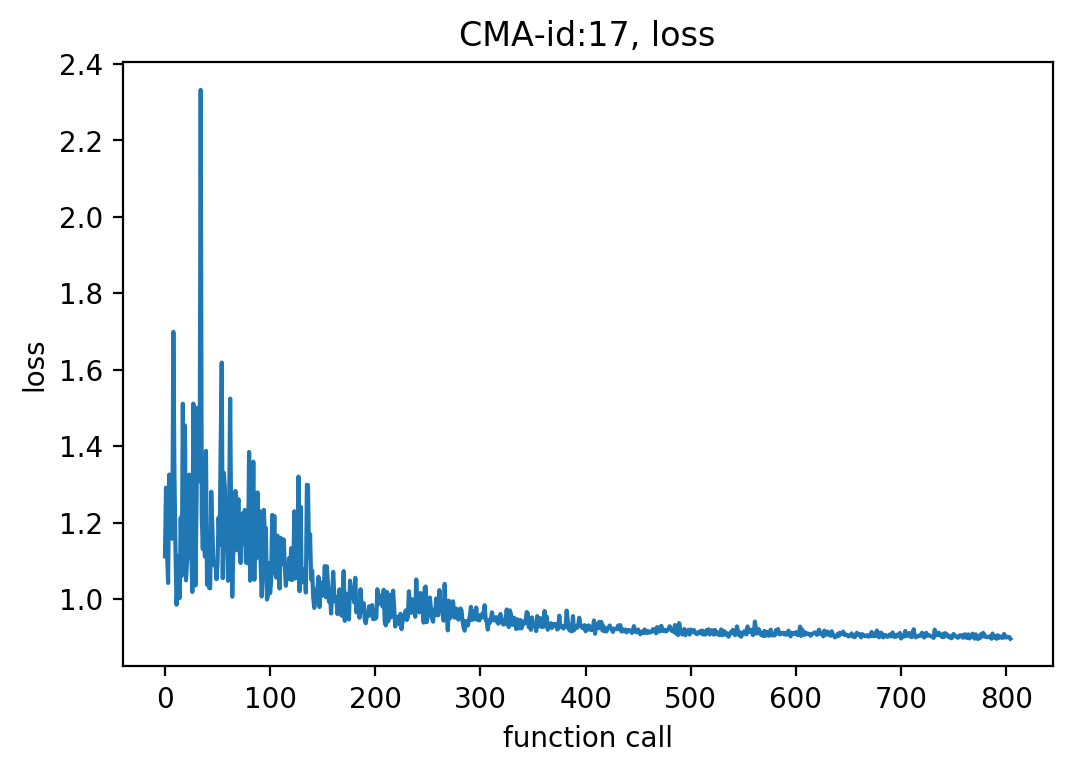

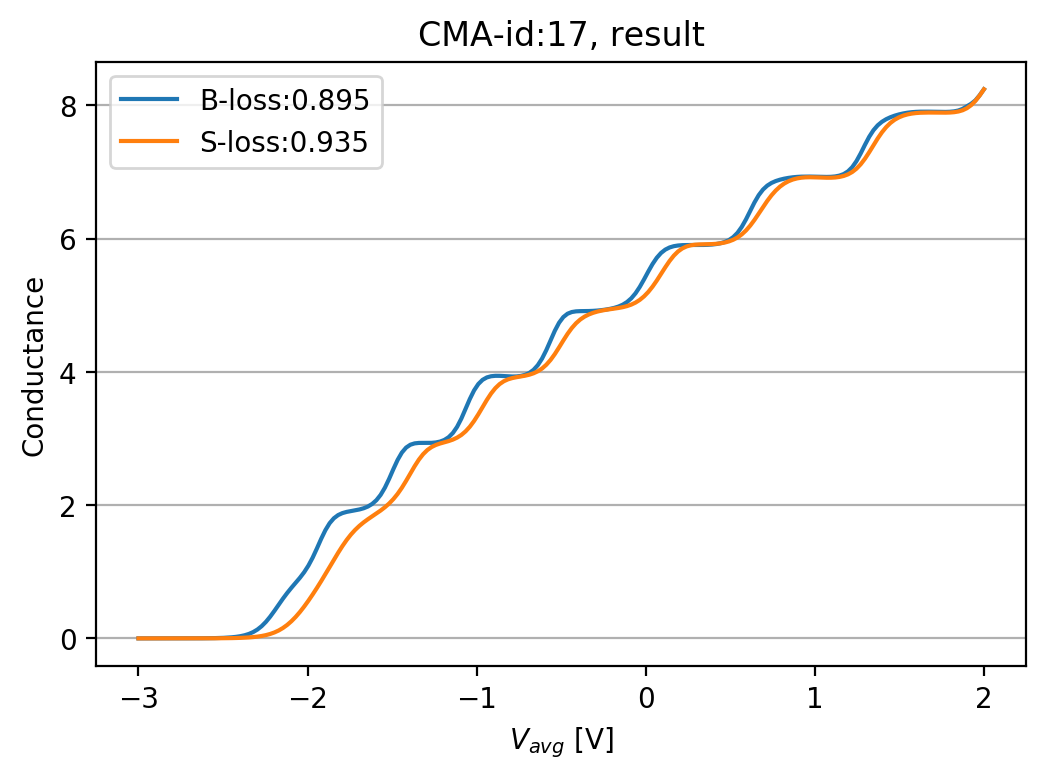

In [35]:
from kwantrl.plotting.plotting import plotter_class
import numpy as np
plotter=plotter_class(17,data_path='C:/Users/Torbjørn/Downloads/')#run_id) #17 good 0.2 disorder, 4H
# print(np.array(plotter.data['voltages'][0]).shape)
plotter.plot_loss()
plotter.plot_result()
# plotter.plot_wave_func([-2,-1.3,-0.5,0.5])
# plotter.plot_wave_func(-1.3,QPC)
# plotter.plot_wave_func(-0.5,QPC)
# plotter.plot_wave_func(0.5,QPC)

In [43]:
run_id=17
dater=datahandler(data_path='C:/Users/Torbjørn/Downloads/')
dataset,_=dater.load_transformed_data(run_id)

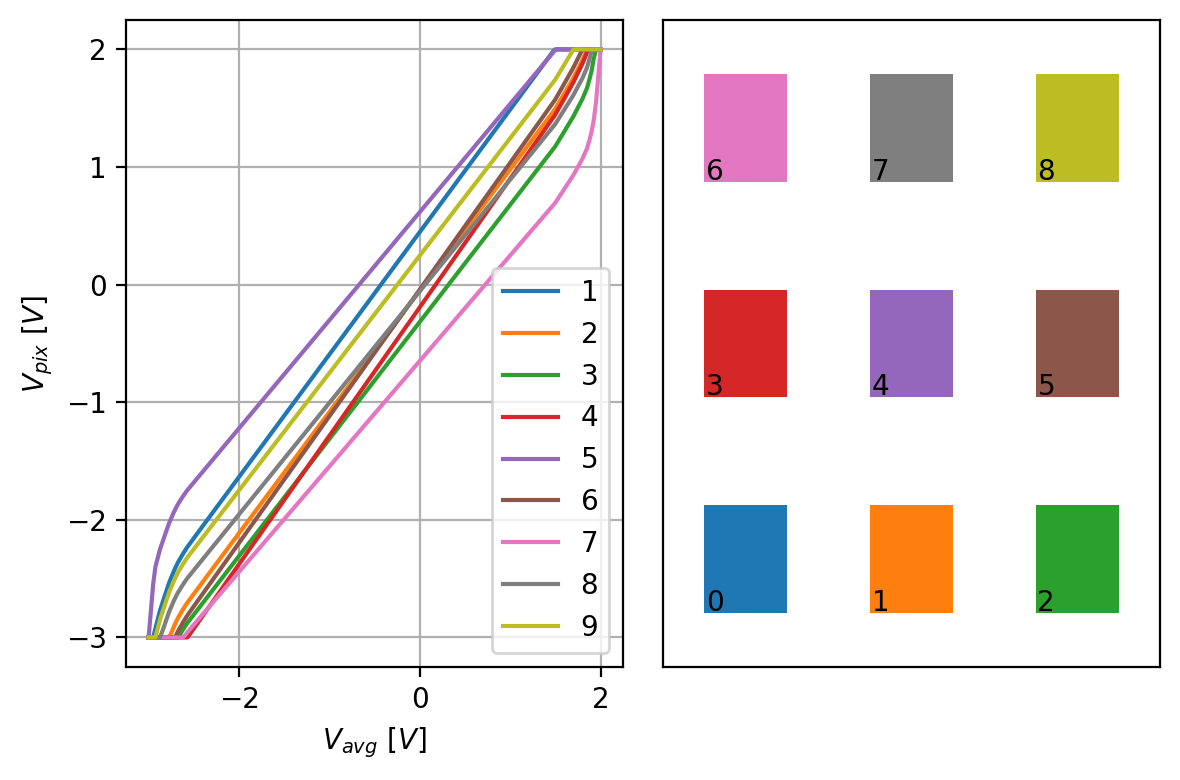

In [37]:
best_voltages=np.array(dataset['voltages'][np.argmin(dataset['loss'])])
import matplotlib.pyplot as plt
labels=[str(i+1) for i in range(9)]
colors=[]
fig,axes=plt.subplots(1,2)
ax=axes[0]
ax2=axes[1]
for i in range(9):
    p=ax.plot(dataset['xaxis'][0],best_voltages[:,i],label=labels[i])
    colors.append(p[0].get_color())
ax.set_xlabel(r"$V_{avg} \ [V]$")
ax.set_ylabel(r"$V_{pix} \ [V]$")
ax.legend()
ax.grid()

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

ax2.set_xlim(0,3)
ax2.set_ylim(0,3)
for i in range(3):
    for j in range(3):
        rect=Rectangle((j+0.25,i+0.25),0.5,0.5)
        pc=PatchCollection([rect],facecolor=colors[i*3+j])
        ax2.text(x=j+0.26,y=i+0.26,s=str(1+i*3+j))
        ax2.add_collection(pc)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
plt.tight_layout()



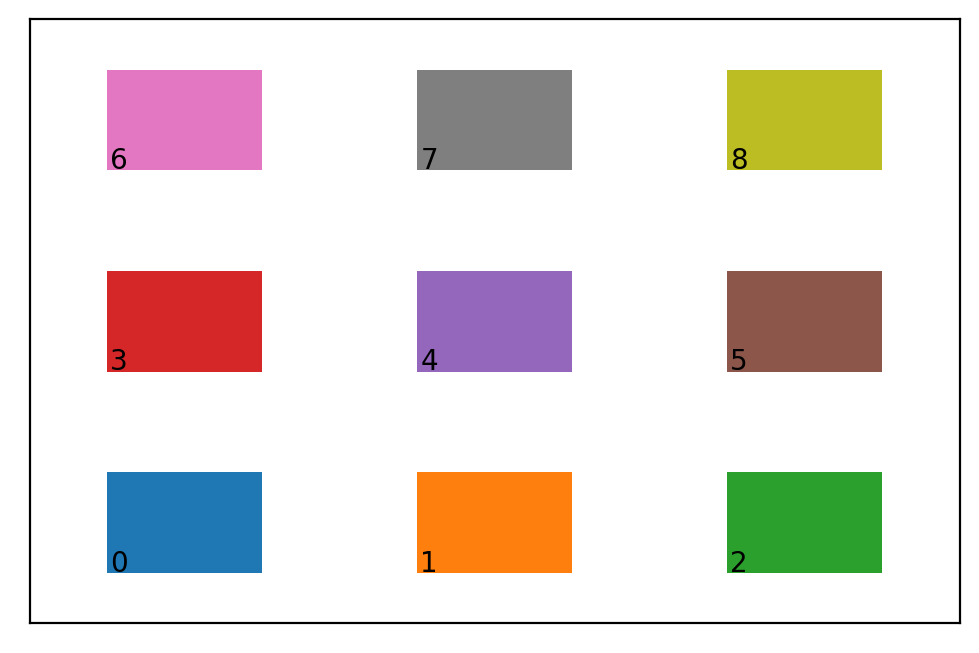

In [ ]:
if ax==None:
            fig,ax=plt.subplots()
        kwant.plot(self.qpc,ax=ax)
        rects=[]
        for gate,dims in enumerate(self.allgatedims):
            rect=Rectangle((dims[1],dims[3]),dims[2]-dims[1],dims[4]-dims[3],zorder=999)
            rects.append(rect)
            ax.text(x=dims[1],y=dims[3],s=str(gate))
            
            
        pc=PatchCollection(rects, facecolor='green',alpha=10)
        ax.add_collection(pc)

In [14]:
# #Below is for making CMA involved.
# import os

# def test():
#     datahand=datahandler()
#     #make a seperate folder for this run
#     newfolder,run_id=datahandler.next_outcmaes_folder_name()
#     print("data saved to:")
#     print(newfolder)
#     os.mkdir(newfolder[:-1])
#     if QPC!=None:
#         datahandler.save_qpc(QPC,run_id)

#     #start a datadict and measure the starting point, cma-es for some reason doesnt measure the starting point
#     datadict={'next_key':0,'measurements':{},'starting_point':{'next_key':0,'measurements':{}}}
#     func_to_minimize(start_point,datadict['starting_point'])

#     args_send=[datadict]
#     args_send.extend(args)


#     options_send={'maxfevals':maxfevals,'verb_filenameprefix':newfolder}
#     for key in options:
#         options_send[key]=options[key]
#     if not stop_time==None:
#         options_send['timeout']=stop_time
        
#     x,es=cma.fmin2(func_to_minimize,start_point,sigma0=sigma,args=args_send,options=options_send,callback=callbacks)

#     #save stopping criterion
#     with open(newfolder+"stopping_criterion.txt",mode='w') as file_object:
#         print(es.stop(),file=file_object)

#     #save the es instance
#     save_es(es,newfolder)

#     #save the datadict
#     datahandler.save_data(datadict,newfolder)
